In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [5]:
df.shape

(887379, 74)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [7]:
df.drop(df.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]),axis=1, inplace=True)

In [8]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(4), object(7)
memory usage: 74.5+ MB


In [10]:
df.annual_inc = df.annual_inc.fillna(0)
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dtype: int64

In [11]:
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df.loc[:, 'label'] = df['loan_status'].apply(classify_label)
df = df.drop('loan_status', axis=1)

In [12]:
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0

In [13]:
def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

In [14]:
def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0
    

In [15]:
df["grade"] = df["grade"].apply(SC_LabelEncoder1)
df["emp_length"] = df["emp_length"].apply(SC_LabelEncoder2)
df["home_ownership"] = df["home_ownership"].apply(SC_LabelEncoder3)

In [16]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,36 months,10.65,162.87,4,12,1,24000.0,Verified,credit_card,0.0
1,2500.0,60 months,15.27,59.83,3,1,1,30000.0,Source Verified,car,1.0
2,2400.0,36 months,15.96,84.33,3,12,1,12252.0,Not Verified,small_business,0.0
3,10000.0,36 months,13.49,339.31,3,12,1,49200.0,Source Verified,other,0.0
4,3000.0,60 months,12.69,67.79,4,2,1,80000.0,Source Verified,other,0.0
5,5000.0,36 months,7.90,156.46,5,4,1,36000.0,Source Verified,wedding,0.0
6,7000.0,60 months,15.96,170.08,3,9,1,47004.0,Not Verified,debt_consolidation,0.0
7,3000.0,36 months,18.64,109.43,1,10,1,48000.0,Source Verified,car,0.0
8,5600.0,60 months,21.28,152.39,0,5,3,40000.0,Source Verified,small_business,1.0
9,5375.0,60 months,12.69,121.45,4,1,1,15000.0,Verified,other,1.0


In [18]:
df.shape


(887379, 11)

In [19]:
df.isnull().sum()




loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
label                  8460
dtype: int64

Text(0.5, 1.0, 'Term/Verification Status distribution')

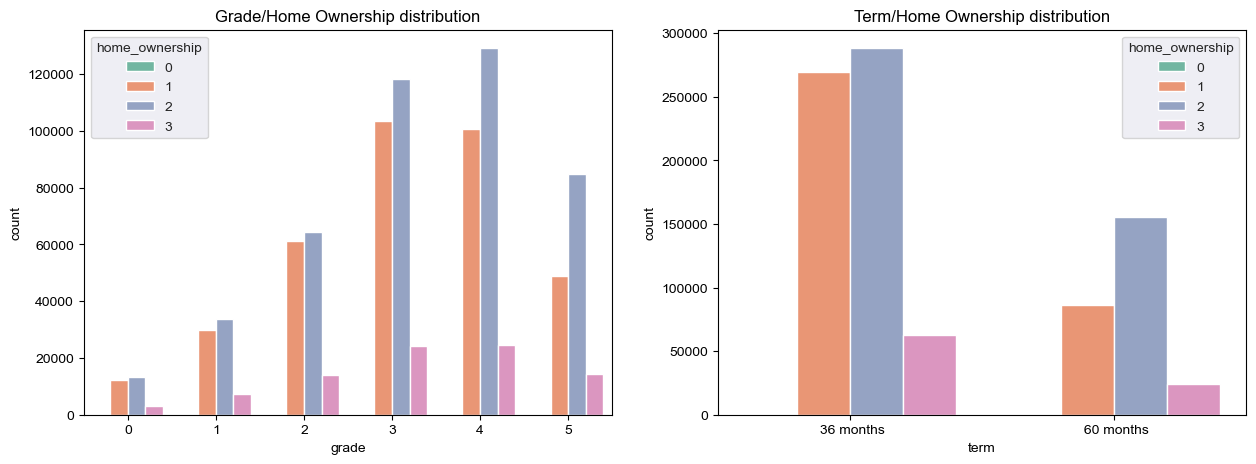

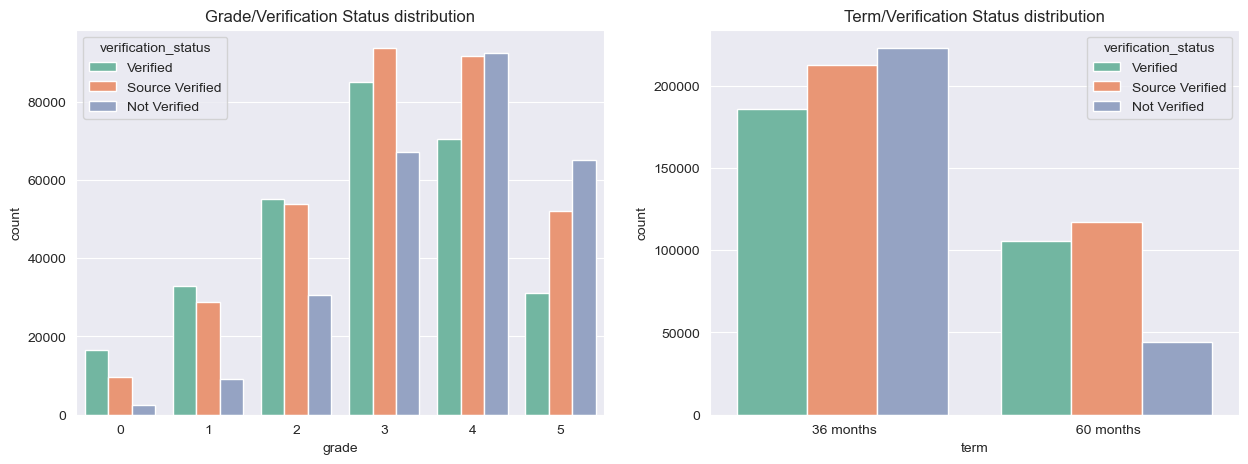

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x = 'grade',hue = 'home_ownership' , ax = ax[0],palette='Set2').set_title("Grade/Home Ownership distribution")
sns.countplot(data=df,x = 'term',hue = 'home_ownership' , ax = ax[1],palette='Set2').set_title("Term/Home Ownership distribution")

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_style('darkgrid')
sns.countplot(data=df,x = 'grade',hue = 'verification_status' , ax = ax[0],palette='Set2').set_title("Grade/Verification Status distribution")
sns.countplot(data=df,x = 'term',hue = 'verification_status' , ax = ax[1],palette='Set2').set_title("Term/Verification Status distribution")

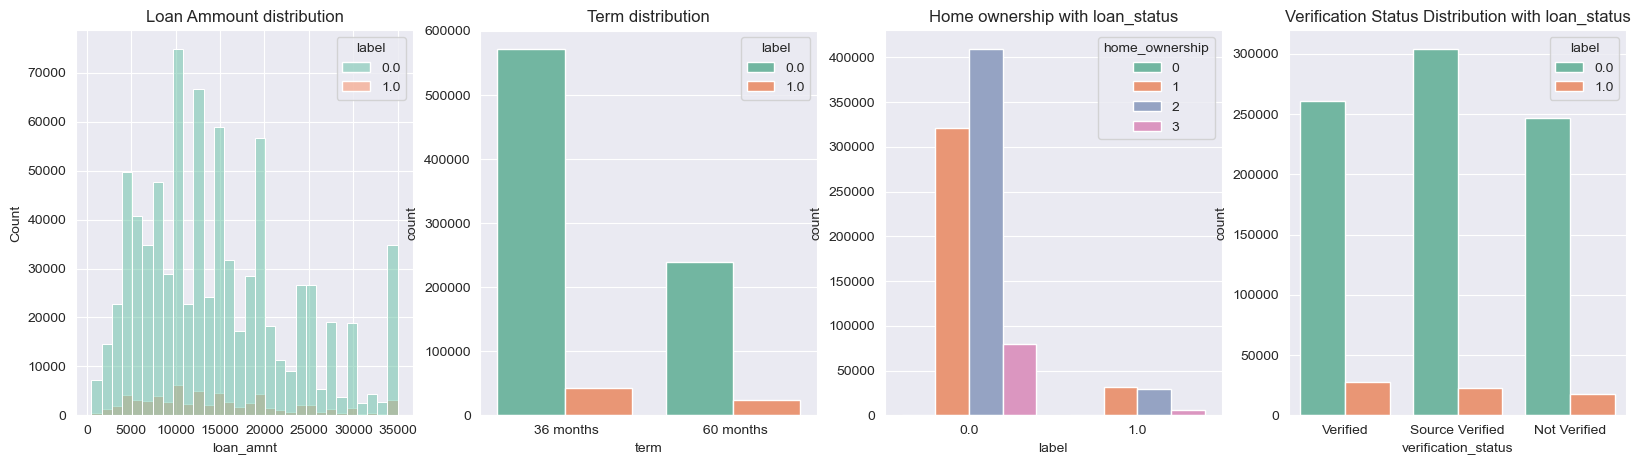

In [21]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.histplot(df, x='loan_amnt',hue="label", bins=30, ax=ax[0],palette='Set2').set_title("Loan Ammount distribution");
sns.countplot(data=df, x='term', hue="label", ax=ax[1],palette='Set2').set_title("Term distribution");
sns.countplot(data=df, hue='home_ownership', x='label', ax=ax[2],palette='Set2').set_title("Home ownership with loan_status");
sns.countplot(data=df, x='verification_status', hue='label', ax=ax[3],palette='Set2').set_title("Verification Status Distribution with loan_status");

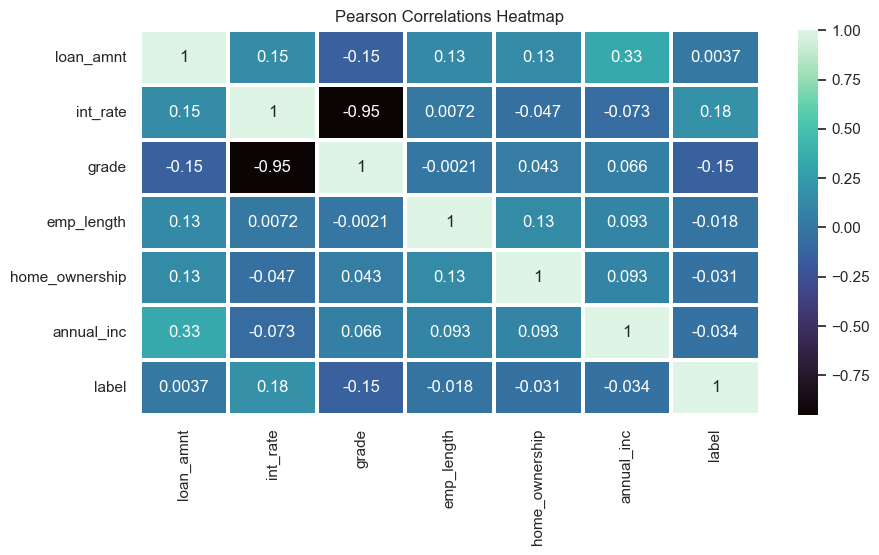

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(df[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','label']].corr(),cbar=True,annot=True,
            linecolor='white',linewidths=1.5,cmap="mako").set_title("Pearson Correlations Heatmap");

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [24]:
df.label = df.label.fillna(1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X, y = df.drop("label", axis=1), df["label"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [31]:
acc = []
pre = []
f1 =[]
rec =[]

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=10)

In [34]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
pred_knn = knn.predict(X_test_scaled)

In [36]:
print("Classification Report :")
print(     classification_report(y_test,pred_knn))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    162233
         1.0       0.22      0.00      0.00     15243

    accuracy                           0.91    177476
   macro avg       0.57      0.50      0.48    177476
weighted avg       0.85      0.91      0.87    177476



In [37]:
print("Accuracy = ",accuracy_score(y_test,pred_knn))

Accuracy =  0.9135770470373459


In [38]:
acc.append(accuracy_score(y_test,pred_knn))
pre.append(precision_score(y_test,pred_knn))
rec.append(recall_score(y_test,pred_knn))
f1.append(f1_score(y_test,pred_knn))

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
rftree = RandomForestClassifier(n_estimators=10)

In [41]:
rftree.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
rftree_pred = rftree.predict(X_test_scaled)

In [43]:
print("Classification Report :")
print(classification_report(y_test,rftree_pred))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    162233
         1.0       0.26      0.04      0.06     15243

    accuracy                           0.91    177476
   macro avg       0.59      0.51      0.51    177476
weighted avg       0.86      0.91      0.88    177476



In [44]:
print("Accuracy = ",accuracy_score(y_test,rftree_pred))

Accuracy =  0.9084946697018188


In [45]:
acc.append(accuracy_score(y_test,rftree_pred))
pre.append(precision_score(y_test,rftree_pred))
rec.append(recall_score(y_test,rftree_pred))
f1.append(f1_score(y_test,rftree_pred))


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [49]:
pred_dtree = dtree.predict(X_test)


In [50]:
print("Classification Report :")
print(classification_report(y_test,pred_dtree))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96    162233
         1.0       0.00      0.00      0.00     15243

    accuracy                           0.91    177476
   macro avg       0.46      0.50      0.48    177476
weighted avg       0.84      0.91      0.87    177476



In [51]:
print("Accuracy = ",accuracy_score(y_test,pred_dtree))

Accuracy =  0.9141123306813316


In [52]:
acc.append(accuracy_score(y_test,pred_dtree))
pre.append(precision_score(y_test,pred_dtree))
rec.append(recall_score(y_test,pred_dtree))
f1.append(f1_score(y_test,pred_dtree))

In [53]:
labels = ['KNN','Random Forest','Decision Tree']

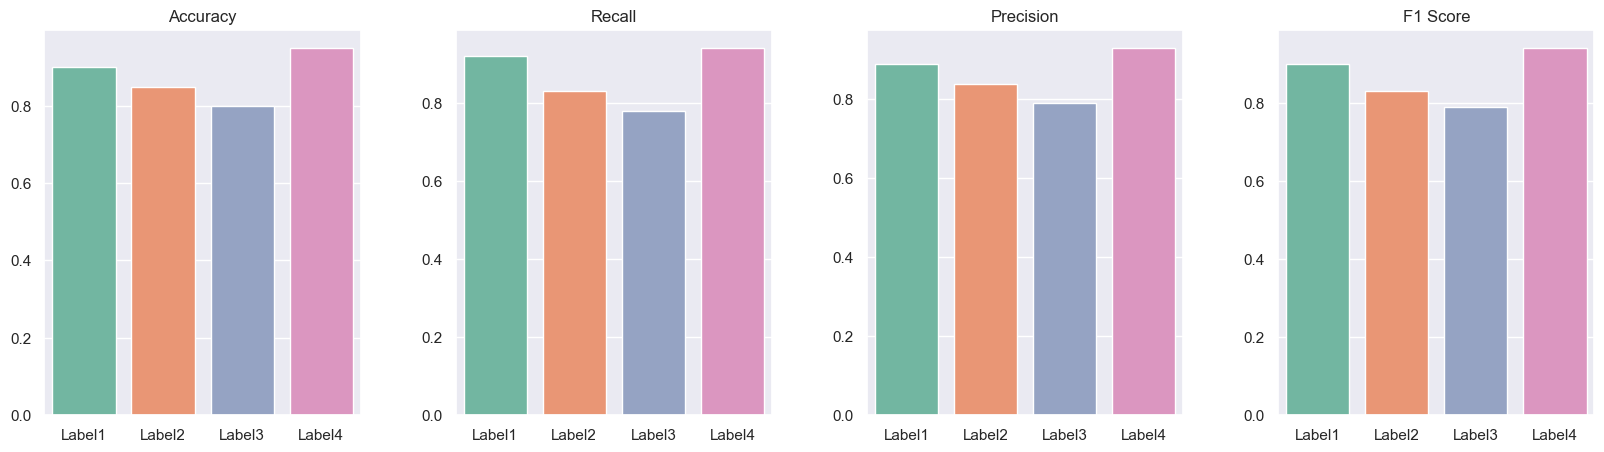

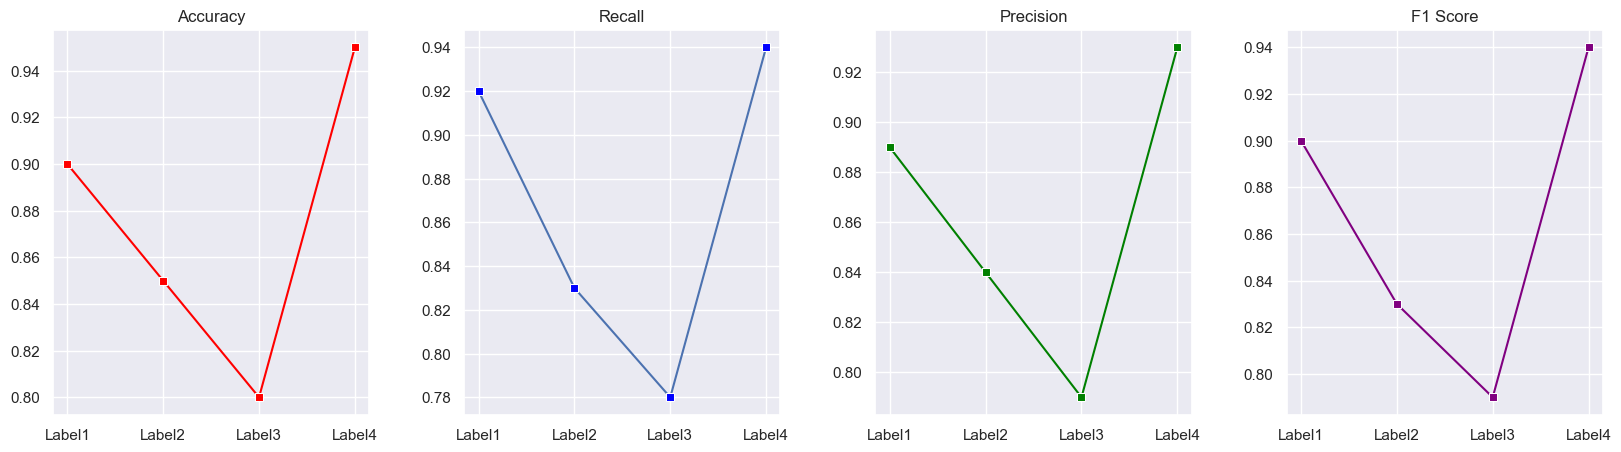

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for illustration
labels = ['Label1', 'Label2', 'Label3', 'Label4']
acc = [0.9, 0.85, 0.8, 0.95]
rec = [0.92, 0.83, 0.78, 0.94]
pre = [0.89, 0.84, 0.79, 0.93]
f1 = [0.90, 0.83, 0.79, 0.94]

# Bar plots
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.set_style('darkgrid')
sns.barplot(x=labels, y=acc, palette='Set2', ax=ax[0]).set_title("Accuracy")
sns.barplot(x=labels, y=rec, palette='Set2', ax=ax[1]).set_title("Recall")
sns.barplot(x=labels, y=pre, palette='Set2', ax=ax[2]).set_title("Precision")
sns.barplot(x=labels, y=f1, palette='Set2', ax=ax[3]).set_title("F1 Score")

plt.subplots_adjust(wspace=0.3)
plt.show()

# Line plots
fig2, ax2 = plt.subplots(1, 4, figsize=(20, 5))
sns.set_style('darkgrid')
sns.lineplot(x=labels, y=acc, ax=ax2[0], marker='s', color='red').set_title("Accuracy")
sns.lineplot(x=labels, y=rec, ax=ax2[1], marker='s', markerfacecolor='blue').set_title("Recall")
sns.lineplot(x=labels, y=pre, ax=ax2[2], marker='s', color='green').set_title("Precision")
sns.lineplot(x=labels, y=f1, ax=ax2[3], marker='s', color='purple').set_title("F1 Score")

plt.subplots_adjust(wspace=0.3)
plt.show()
